## 이미지 다운받기

In [7]:
import os
from PIL import Image
import requests

image_url = ('https://ee5817f8e2e9a2e34042-3365e7f0719651e5b'
            '8d0979bce83c558.ssl.cf5.rackcdn.com/python.png')

image = requests.get(image_url).content # 서버응답을 받아, 파일내용 획득
filename = os.path.basename(image_url) # URL에서 파일명 획득
with open(filename, 'wb') as f:
    f.write(image) # 파일에 저장

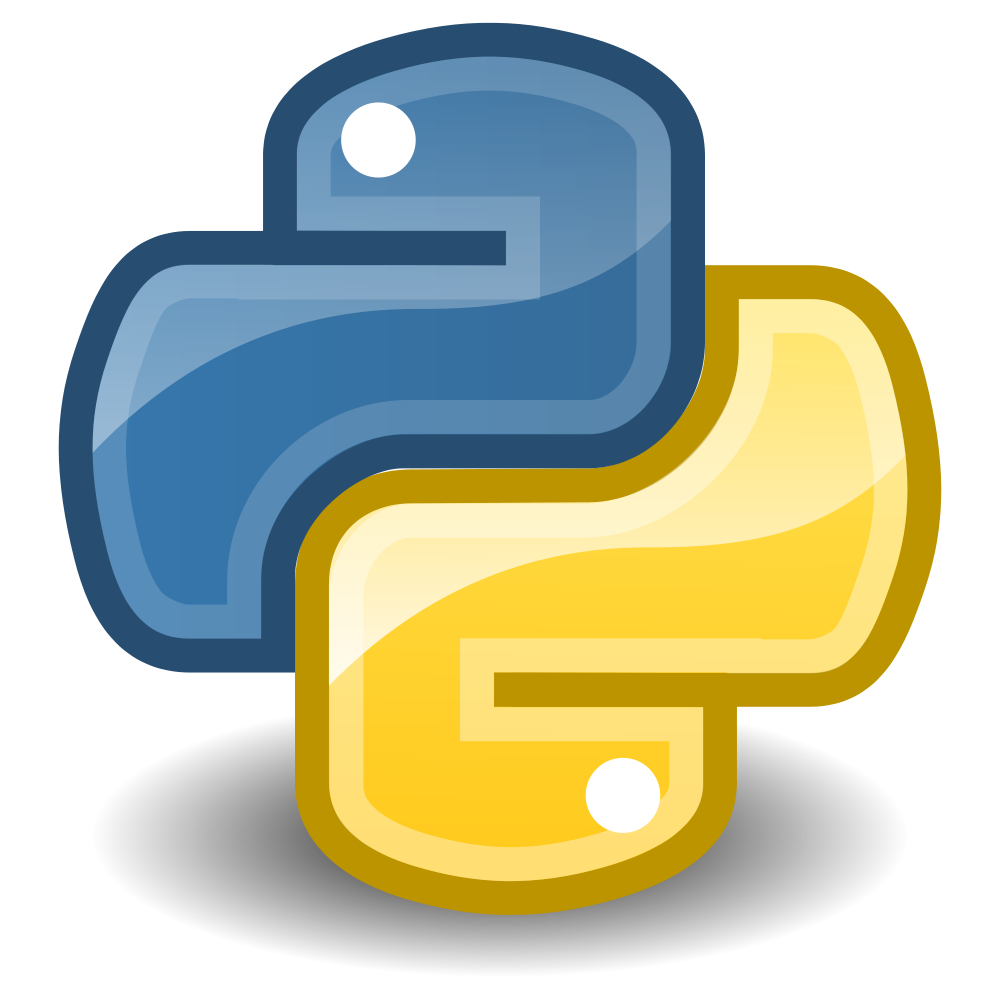

In [9]:
from IPython.display import Image
Image(filename='python.png')

## 이미지 품질 낮추기

In [11]:
from PIL import Image as PILImage

In [14]:
with PILImage.open('python.png') as im:
    im.save('python_quality_40.jpg', quality=40)
    
    with PILImage.new('RGBA', im.size, (255, 255, 255)) as canvas:
        merged_im = PILImage.alpha_composite(canvas, im)
        merged_im.save('python_bg_white.jpg', quality=80)

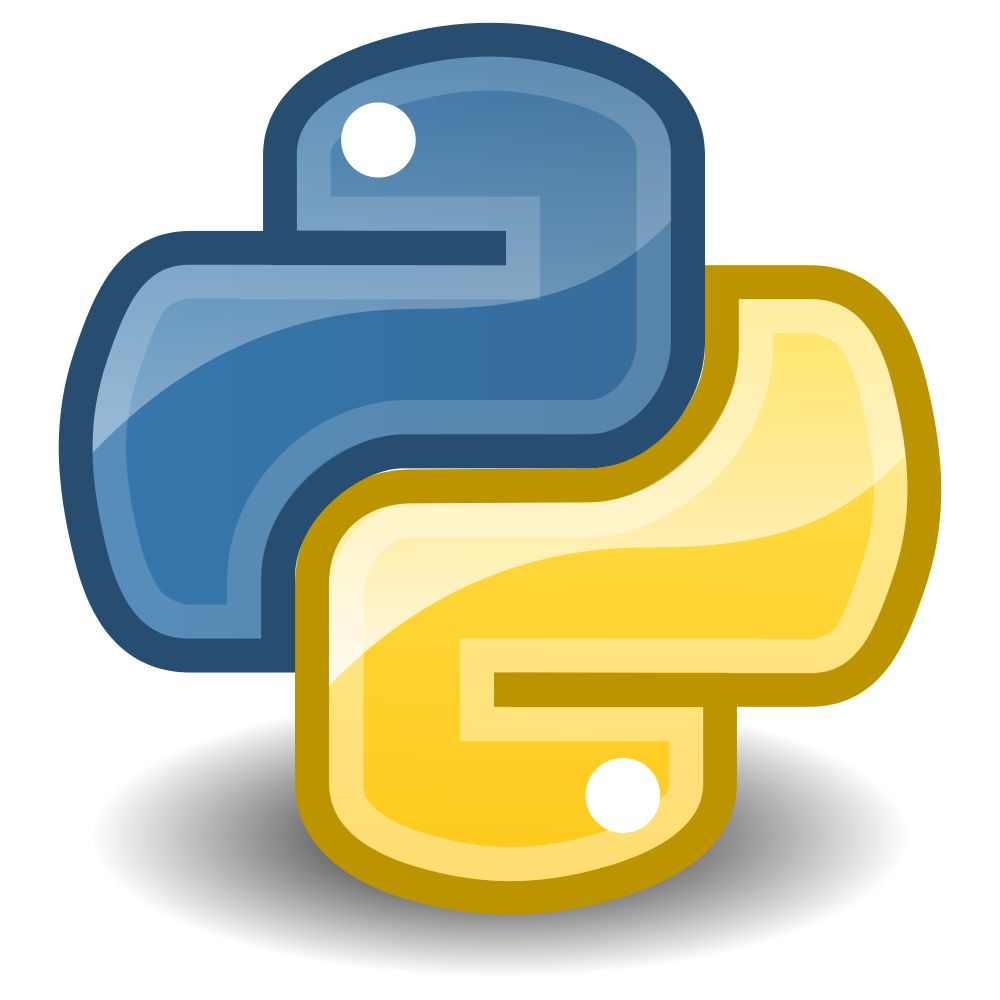

In [16]:
from IPython.display import Image
Image(filename='python_bg_white.jpg')

## 가로/세로 크기 줄이기

In [17]:
with PILImage.open('python.png') as im:
    im.thumbnail((300, 300))
    im.save('python_300_300.png')

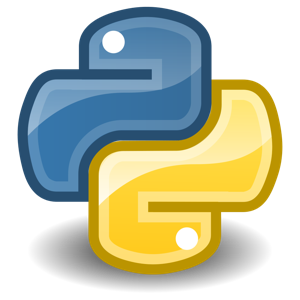

In [18]:
Image(filename='python_300_300.png')

## 이미지 합치기

In [20]:
img1_url = 'http://imgcomic.naver.net/webtoon/20853/1093/20170529163407_0ed8a697d896451fee4bc3642fb46db8_IMAG01_3.jpg'
img2_url = 'http://imgcomic.naver.net/webtoon/20853/1093/20170529163407_0ed8a697d896451fee4bc3642fb46db8_IMAG01_4.jpg'

In [25]:
import requests
headers = {
    'Referer': 'http://comic.naver.com/webtoon/detail.nhn?titleId=20853&no=1093&weekday=tue'
}
img1_data = requests.get(img1_url, headers=headers).content
img2_data = requests.get(img2_url, headers=headers).content

In [27]:
with open('img1.jpg', 'wb') as f:
    f.write(img1_data)
    
with open('img2.jpg', 'wb') as f:
    f.write(img2_data)

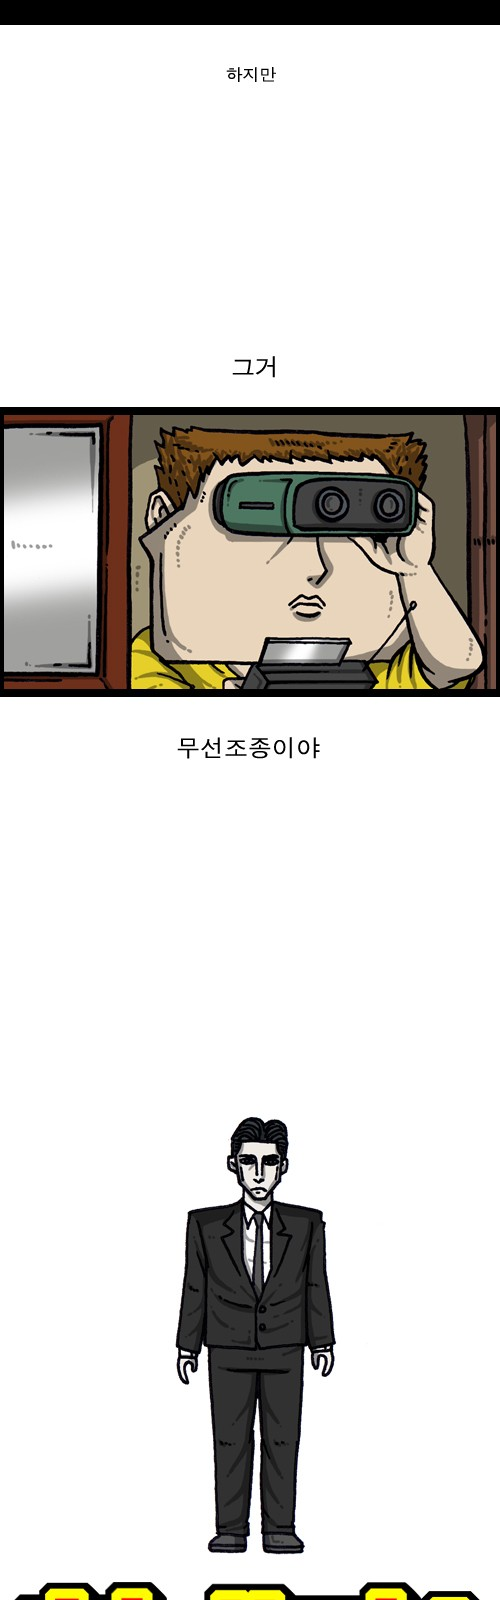

In [28]:
Image(filename='img1.jpg')

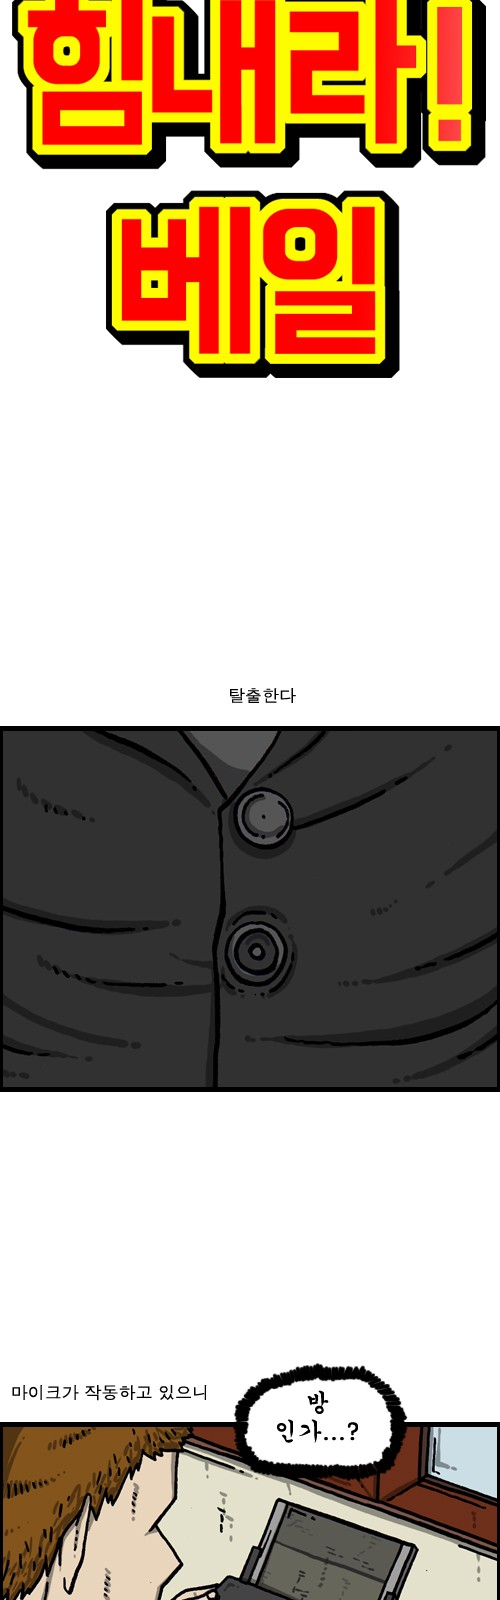

In [29]:
Image(filename='img2.jpg')

In [30]:
with PILImage.open('img1.jpg') as im1:
    with PILImage.open('img2.jpg') as im2:
        width = max(im1.width, im2.width)
        height = sum((im1.height, im2.height))
        with PILImage.new('RGB', (width, height), (255, 255, 255)) as canvas:
            canvas.paste(im1, box=(0,0))
            canvas.paste(im2, box=(0, im1.height))
            canvas.save('img_merged.jpg')

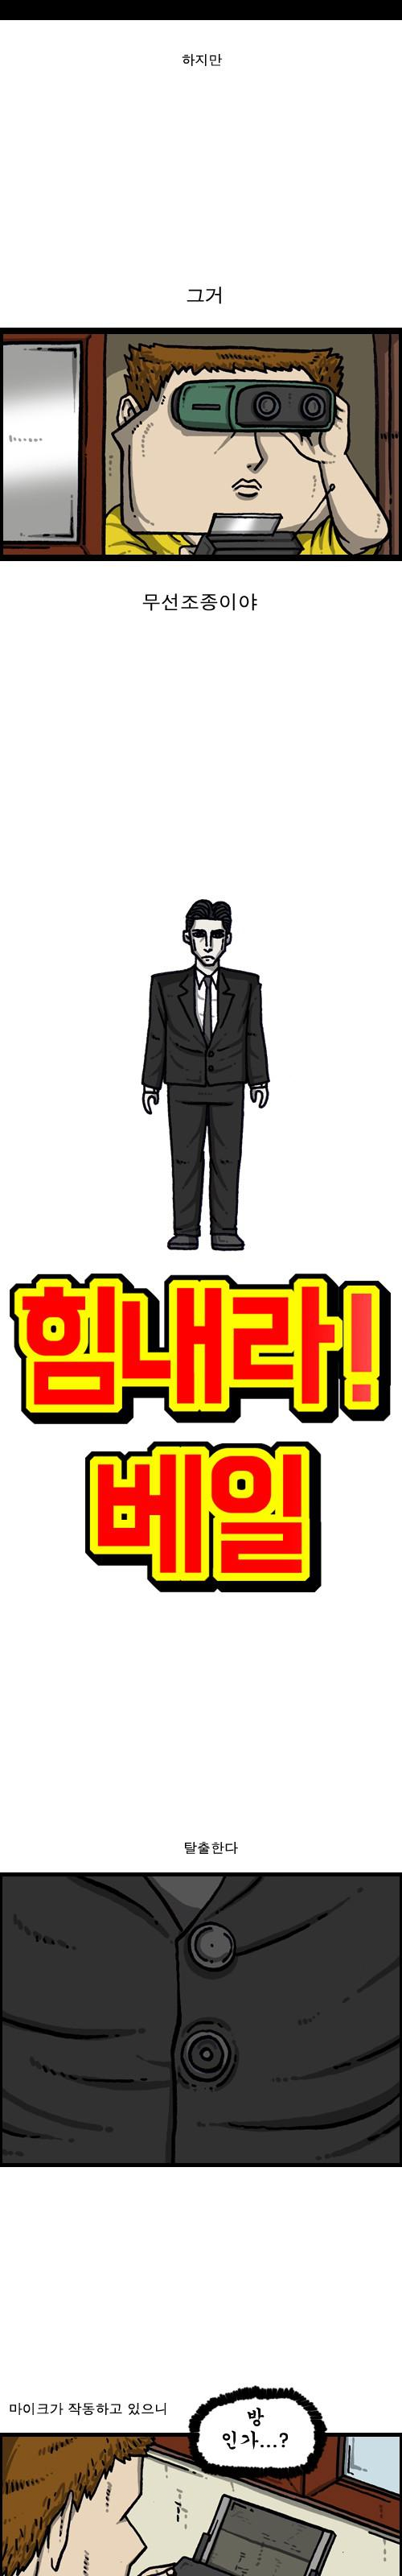

In [32]:
Image(filename='img_merged.jpg')